In [1]:
import dpm.monte_carlo as monte_carlo
from dpm.distributions import Normal, Uniform
from dpm.visualize import plot_hist
from matplotlib import pyplot as plt
import numpy as np

In [2]:
model = Normal(-7.3, 4.0)

In [3]:
def entropy(x):
    return -model.log_prob(x)

In [4]:
print(f"E[X]   : {monte_carlo.expectation(model).item():.2f}")
print(f"E[X^2] : {monte_carlo.variance(model).item():.2f}")
print(f"Entropy: {monte_carlo.monte_carlo(entropy, model).item():.2f}")
print(f"Median : {monte_carlo.median(model).item():.2f}")
print(f"P(X <= -7.3): {monte_carlo.cdf(model, -7.3):.2f}")
print(f"P(X <= -9): {monte_carlo.cdf(model, -9, batch_size=10000):.2f}")

E[X]   : -7.25
E[X^2] : 3.97
Entropy: 2.08
Median : -7.29
P(X <= -7.3): 0.54
P(X <= -9): 0.19


In [5]:
print(f"E[X]   : {model.expectation().item():.2f}")
print(f"E[X^2] : {model.variance().item():.2f}")
print(f"Entropy: {model.entropy().item():.2f}")
print(f"Median : {model.median().item():.2f}")
print(f"P(X <= -7.3): {model.cdf(-7.3):.2f}")

E[X]   : -7.30
E[X^2] : 4.00
Entropy: 2.11
Median : -7.25
P(X <= -7.3): 0.49


In [6]:
uni = Uniform(-1., 5.)

In [7]:
print(f"E[X]   : {uni.expectation().item():.2f}")
print(f"E[X^2] : {uni.variance().item():.2f}")
print(f"Entropy: {uni.entropy().item():.2f}")
print(f"Median : {uni.median().item():.2f}")
print(f"P(X <= -7.3): {uni.cdf(2):.2f}")
print(f"Max: {monte_carlo.max(uni)}")
print(f"Min: {monte_carlo.min(uni)}")

E[X]   : 1.99
E[X^2] : 3.02
Entropy: 1.79
Median : 1.92
P(X <= -7.3): 0.49
Max: 4.994800567626953
Min: -0.9983316659927368


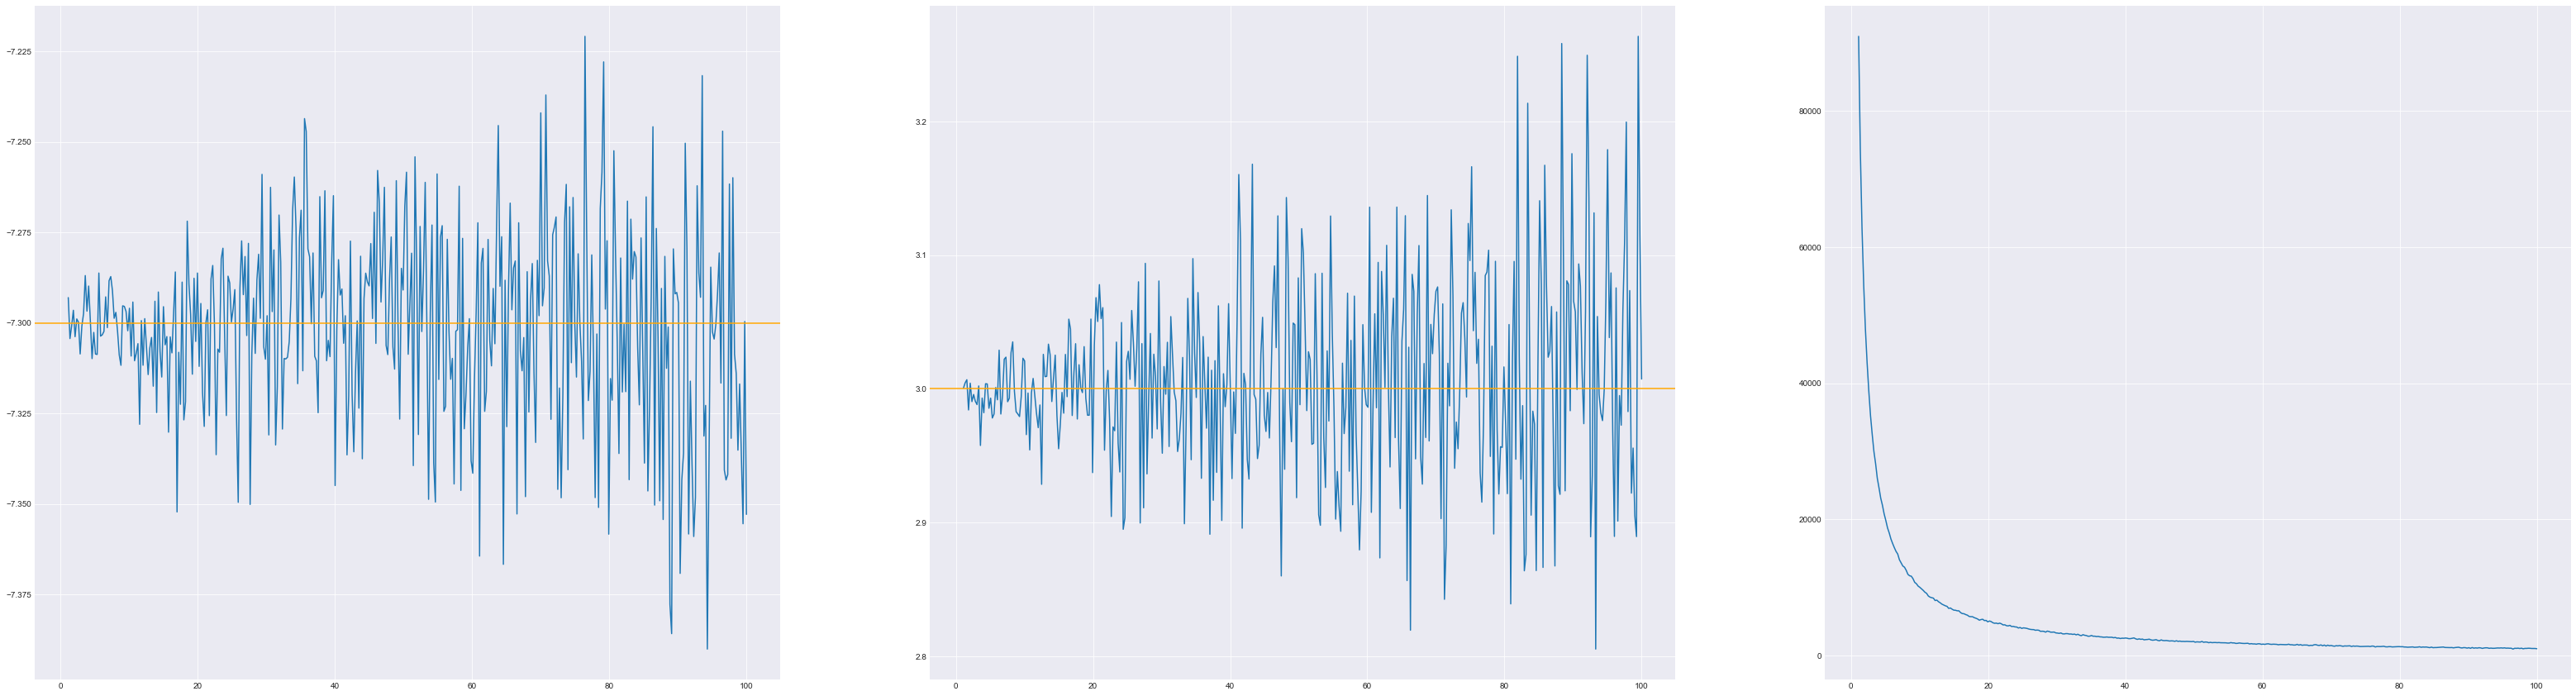

In [8]:
model = Normal([-7.3, -7.3], [3., 3.], diag=True)
stats = {'mu':[], 'var':[], 'num_samples': []}
M = np.linspace(1.1, 100, 400)
for m in M:
    samples = monte_carlo.rejection_sampling(model, Normal([-7.3, -7.3], [3., 3.], diag=True, learnable=False), m, 
                                             batch_size=100000)
    stats['mu'].append(samples.mean())
    stats['var'].append(samples.var())
    stats['num_samples'].append(samples.size(0))


fig, axes = plt.subplots(1, 3, figsize=(55, 15))
axes[0].plot(M, stats['mu'])
axes[0].axhline(-7.3, c='orange')

axes[1].plot(M, stats['var'])
axes[1].axhline(3, c='orange')

axes[2].plot(M, stats['num_samples'])
plt.show()






tensor([0.5072]) tensor([0.2141])
torch.Size([1386, 1])


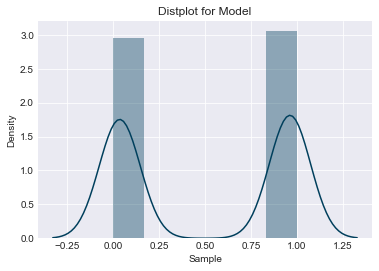

In [9]:
samples = monte_carlo.beta_sampling(0.5, 0.5)
print(samples.mean(0), samples.var(0))
print(samples.shape)
plot_hist(samples)

tensor([-0.5397]) tensor([2.9535])
torch.Size([4837, 1])


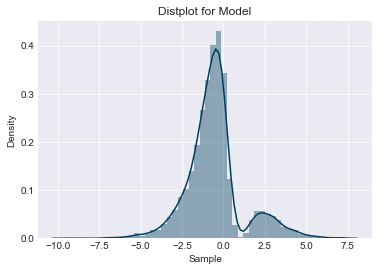

In [10]:
samples = monte_carlo.double_exponential()
print(samples.mean(0), samples.var(0))
print(samples.shape)
plot_hist(samples)

tensor([0.0003]) tensor([1.4674])
torch.Size([20000, 1])


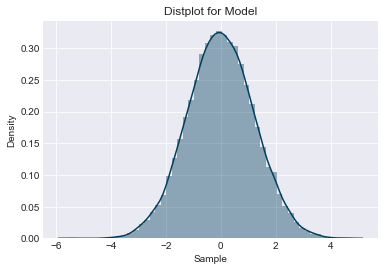

In [11]:
samples = monte_carlo.box_muller()
print(samples.mean(0), samples.var(0))
print(samples.shape)
plot_hist(samples)

tensor([0.0009]) tensor([0.9909])
torch.Size([15686, 1])


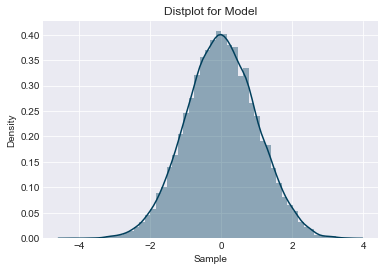

In [13]:
samples = monte_carlo.marsaglia_bray(n_dims=1)
print(samples.mean(0), samples.var(0))
print(samples.size())
plot_hist(samples)